In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

#데이터 읽기
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#Tensor 및 Flow 정의
# 28X28개의 데이터가 입력됨
X = tf.placeholder(tf.float32, [None, 784])

# 10개의 결과가 출력됨(ONEHOT 방식)
Y = tf.placeholder(tf.float32, [None, 10]) 

#입력층 설계
W1 = tf.Variable(tf.random_normal([784,256], stddev=0.01))
b1 = tf.Variable(tf.random_normal([256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1)+b1)

#은닉층 설계
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
b2 = tf.Variable(tf.random_normal([256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2)+b2)

#출력층 설계
W3=tf.Variable(tf.random_normal([256,10], stddev=0.01))
b3 = tf.Variable(tf.random_normal([10], stddev=0.01))
L3 = tf.matmul(L2, W3) + b3

#L3의 결과는 소프트 맥스를 통해 ONEHOT 방식으로 변환됨
#코스트 계산은 소프트맥스의 엔트로피 방식을 이용
S = tf.nn.softmax_cross_entropy_with_logits_v2(logits=L3, labels=Y)
cost = tf.reduce_mean(S)

# 옵티마이저는 아담옵티마이저 사용
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
init = tf.global_variables_initializer()

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [15]:
#실행부분
sess = tf.Session()  
sess.run(init)

#한번에 학습시킬 샘플의 크기.
batch_size = 100

#10회 반복 강화학습.
epoch_cnt = 10

#1 epoch의 반복횟수 정하기 (학습데이터샘플 / batch_size)
total_batch = int(mnist.train.num_examples / batch_size) 

#epoch_cnt수만큼 epoch 실행
for epoch in range(epoch_cnt):
    total_cost = 0
    
    #total_batch회 반복하여 1epoch를 실행
    for i in range(total_batch):
        #100개의 데이터를 학습데이터로 읽어옴.
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        #학습진행 후 100회학습마다 코스트 계산
        _, cost_val = sess.run([optimizer, cost], feed_dict = {X: batch_xs, Y:batch_ys})
        
        #반복마다 코스트 누적
        total_cost += cost_val

    #반복이 끝난후 각 epoch 마다평균 코스트를 ㅊ ㅜㄹ력
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost = ', '{:.3f}'.format(total_cost / total_batch))

print('optimizer complete!')
is_correct = tf.equal(tf.argmax(L3, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

#검증 데이터를 이용한 성능 검증.
print('Accuracy :', sess.run(accuracy, feed_dict={X: mnist.test.images, Y:mnist.test.labels}))



Epoch: 0001 Avg. cost =  0.403
Epoch: 0002 Avg. cost =  0.151
Epoch: 0003 Avg. cost =  0.097
Epoch: 0004 Avg. cost =  0.072
Epoch: 0005 Avg. cost =  0.054
Epoch: 0006 Avg. cost =  0.041
Epoch: 0007 Avg. cost =  0.032
Epoch: 0008 Avg. cost =  0.027
Epoch: 0009 Avg. cost =  0.022
Epoch: 0010 Avg. cost =  0.017
optimizer complete!
Accuracy : 0.9768


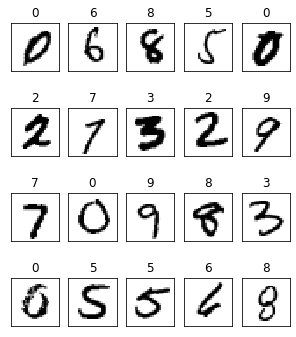

In [16]:
labels = sess.run(L3, feed_dict = { X: mnist.test.images, Y:mnist.test.labels })
fig = plt.figure(figsize=(5,6))
for i in range(20):
    r = random.randint(1, mnist.test.num_examples - 1)
    subplot = fig.add_subplot(4, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[r]))
    subplot.imshow(mnist.test.images[r].reshape((28, 28)), cmap=plt.cm.gray_r)

plt.show()

55000